In [1]:
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv('House Rental Data.txt', index_col = 0)

In [9]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [10]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

Lets see the correlation between various features

In [11]:
corr = df.corr()

In [12]:
corr

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


Lets find out the optimum number of clusters

In [14]:
from sklearn.cluster import KMeans

In [17]:
wcss = []

for i in range(1,15):
    k_means = KMeans(n_clusters = i,init = 'k-means++', random_state = 4)
    k_means.fit(df)
    wcss.append(k_means.inertia_)

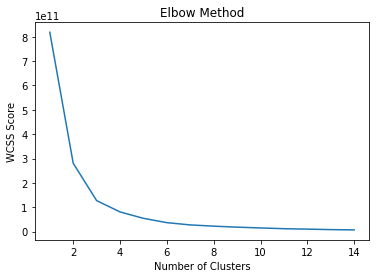

In [18]:

import matplotlib.pyplot as plt
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')    
plt.show()

It seems like 6 would be the optimal number of clusters.

In [20]:
k_means = KMeans(n_clusters = 6, init = 'k-means++', random_state = 4)
k_means.fit(df)
print(k_means.labels_)

[4 4 1 1 1 2 1 1 1 4 3 3 3 1 1 5 1 3 5 3 2 5 1 5 0 5 0 2 3 3 4 4 1 1 1 1 1
 1 0 3 2 1 3 4 4 1 1 4 0 3 4 4 3 3 0 4 3 3 3 1 3 3 1 1 3 3 3 3 3 1 3 3 5 3
 3 4 1 3 5 3 1 3 1 1 1 1 2 1 4 4 4 4 1 4 1 1 4 4 1 4 4 1 5 2 2 5 4 3 1 4 1
 1 5 4 5 1 2 3 3 3 1 1 4 4 2 1 1 5 3 3 4 1 5 3 5 1 3 4 4 5 2 1 1 1 3 3 5 0
 3 1 5 4 1 1 1 3 1 1 3 1 4 1 3 0 1 5 5 5 1 3 1 4 5 2 3 4 5 3 1 3 3 1 2 1 3
 3 3 1 1 4 1 3 4 1 1 4 4 3 1 3 3 4 1 3 1 1 1 3 4 4 1 3 4 1 1 1 1 2 3 5 1 1
 5 3 2 1 3 1 4 1 4 4 5 4 1 3 1 1 1 4 1 1 2 1 2 1 2 1 2 1 5 1 4 1 1 3 4 1 4
 1 3 3 1 1 3 3 3 3 3 1 1 4 3 3 3 3 3 5 5 1 3 1 1 1 5 1 0 5 1 5 1 3 2 1 1 4
 5 5 5 0 4 1 1 4 1 1 5 1 1 3 4 3 1 3 1 1 4 4 5 4 1 1 2 4 3 4 1 0 1 1 1 4 3
 2 4 3 1 3 3 4 1 3 1 1 3 3 3 2 3 1 1 3 5 1 1 4 1 4 4 5 1 4 1 3 3 3 5 4 1 3
 3 3 1 1 1 3 3 4 1 4 5 4 4 1 1 4 5 3 1 3 1 2 4 3 1 5 4 3 3 3 3 4 4 3 3 3 3
 3 3 1 3 3 3 1 3 1 1 2 3 3 3 1 1 5 5 4 5 0 1 3 4 5 1 1 5 0 1 3 4 1 3 1 4 2
 5 2 5 1 1 3 1 3 3 3 3 1 3 1 1 1 4 1 1 5 3 3 1 2 3 0 5 5 5 1 5 1 1 1 3 1 5
 5 4 5 4 1 3 3 1 1 3 2 5 

Lets add this as a column to our df and see the clustering visualised

In [52]:
df['cluster'] = k_means.labels_

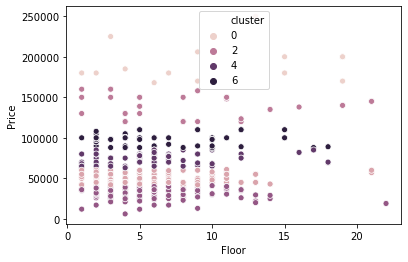

In [47]:
sns.scatterplot(x = df['Floor'], y = df['Price'], hue = df['cluster'])

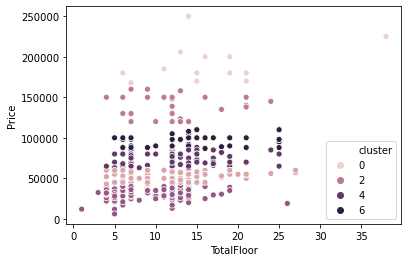

In [49]:
sns.scatterplot(x = df['TotalFloor'], y = df['Price'], hue = df['cluster'])

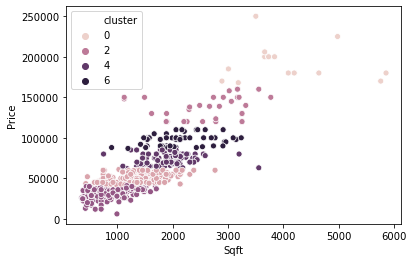

In [50]:
sns.scatterplot(x = df['Sqft'], y = df['Price'], hue = df['cluster'])

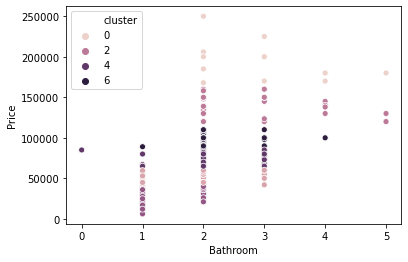

In [51]:
sns.scatterplot(x = df['Bathroom'], y = df['Price'], hue = df['cluster'])